<a href="https://colab.research.google.com/github/M-D-R-K/cv-session/blob/main/A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/sgauthamr2001/cv-session.git
%cd cv-session/


Cloning into 'cv-session'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 76 (delta 1), reused 0 (delta 0), pack-reused 74
Unpacking objects: 100% (76/76), done.
/content/cv-session


In [1]:
import cv2
import numpy as np
import matplotlib as plt
from google.colab.patches import cv2_imshow

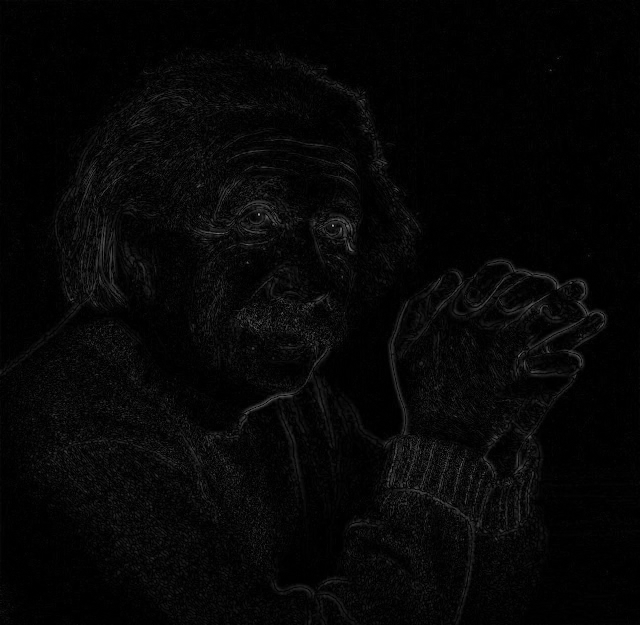

In [40]:

img = cv2.imread('media/einstein.jpg', 0)

gb1 = cv2.GaussianBlur(img, (5, 5), 0.5)
gb2 = cv2.GaussianBlur(img, (9, 9), 3)

f = cv2.absdiff(gb2, gb1)
cv2_imshow(f)

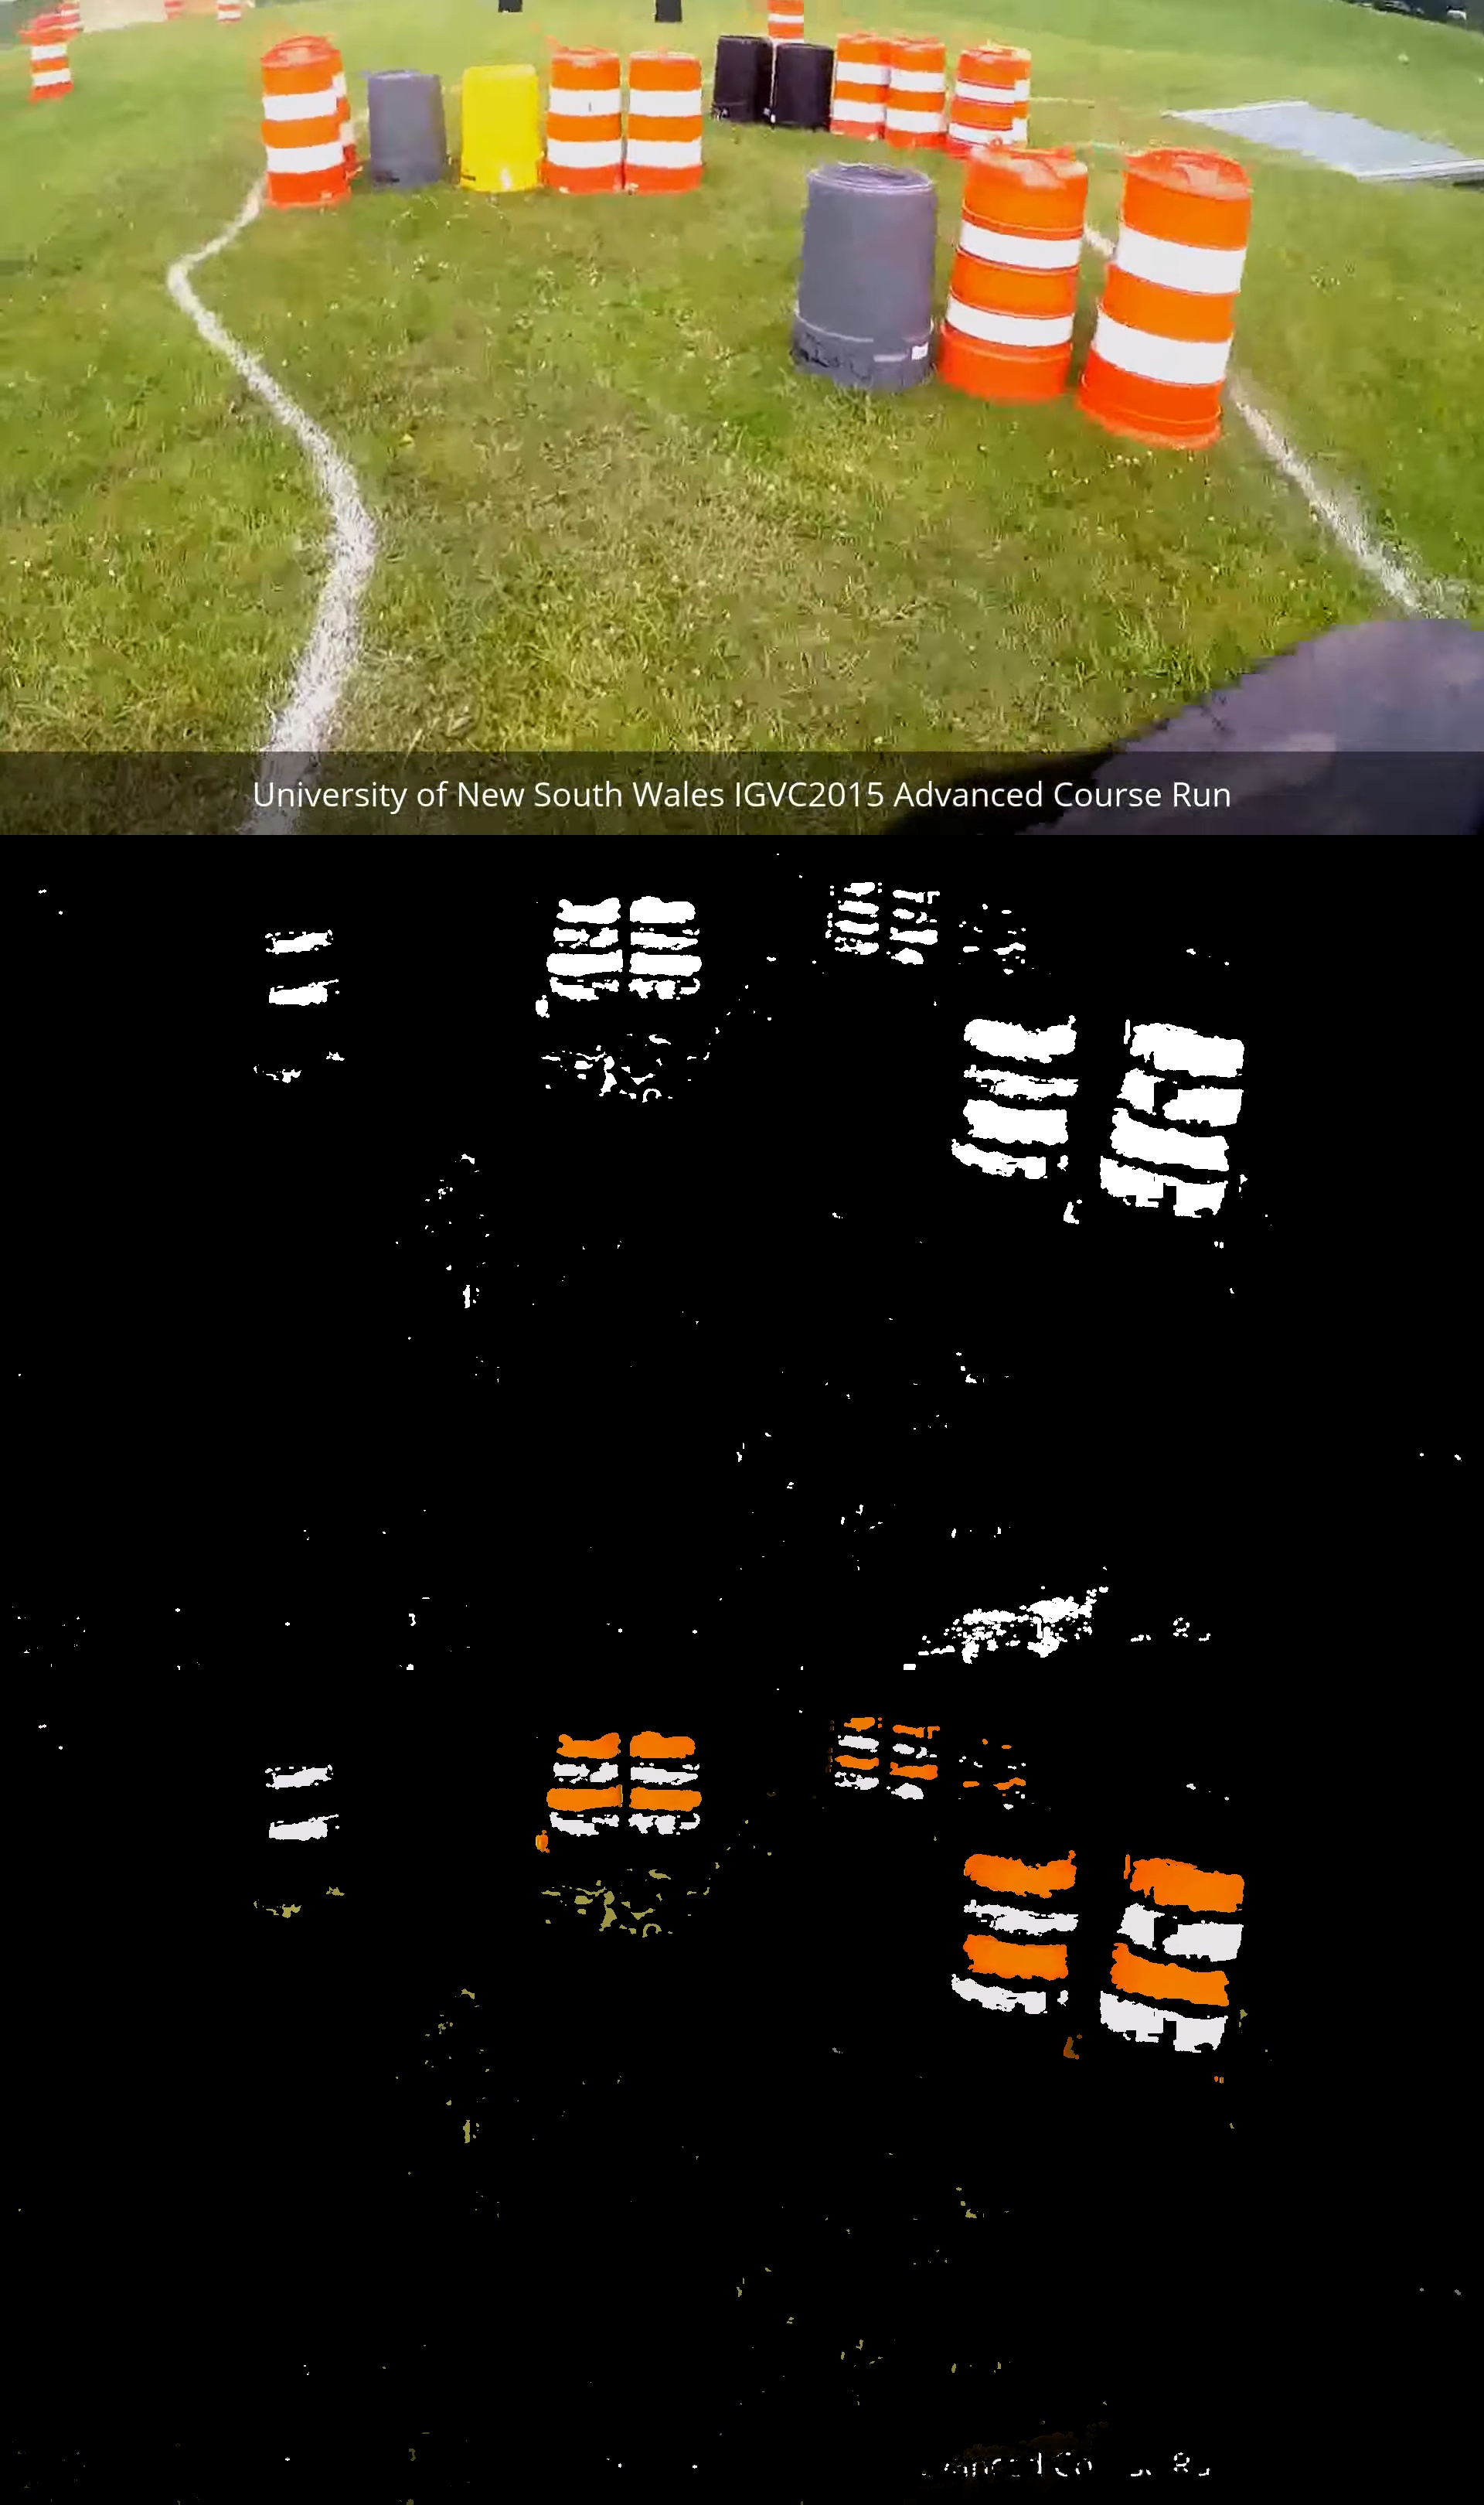

In [65]:
obj = cv2.imread('media/Barrel4.png')
hsv = cv2.cvtColor(obj,cv2.COLOR_BGR2HSV)

test_case = cv2.imread('media/Sample.png')
hsvt = cv2.cvtColor(test_case,cv2.COLOR_BGR2HSV)

obj_hist = cv2.calcHist([hsv],[0, 1], None, [180, 256], [0, 180, 0, 256] )

cv2.normalize(obj_hist,obj_hist,0,255,cv2.NORM_MINMAX)
res = cv2.calcBackProject([hsvt],[0,1],obj_hist,[0,180,0,256],1)
disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
cv2.filter2D(res,-1,disc,res)
ret,thresh = cv2.threshold(dst,100,255,cv2.THRESH_BINARY)
thresh = cv2.merge((thresh,thresh,thresh))
res = cv2.bitwise_and(test_case,thresh)
res = np.vstack((test_case,thresh,res))
cv2.imwrite('res.jpg',res)

a = cv2.imread('res.jpg')
cv2_imshow(a)

In [4]:
cap = cv2.VideoCapture('media/Cones.mp4')
# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi', fourcc, 20.0, (640,  480))
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    obj = cv2.imread('media/Barrel4.png')
    hsv = cv2.cvtColor(obj,cv2.COLOR_BGR2HSV)

    test_case = frame
    hsvt = cv2.cvtColor(test_case,cv2.COLOR_BGR2HSV)

    obj_hist = cv2.calcHist([hsv],[0, 1], None, [180, 256], [0, 180, 0, 256] )

    cv2.normalize(obj_hist,obj_hist,0,255,cv2.NORM_MINMAX)
    res = cv2.calcBackProject([hsvt],[0,1],obj_hist,[0,180,0,256],1)
    disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    cv2.filter2D(res,-1,disc,res)
    ret,thresh = cv2.threshold(dst,100,255,cv2.THRESH_BINARY)
    thresh = cv2.merge((thresh,thresh,thresh))
    res = cv2.bitwise_and(test_case,thresh)
    res = np.vstack((test_case,thresh,res))
    frame = res
    # write the flipped frame
    out.write(frame)
    cv2_imshow(frame)
    if cv2.waitKey(1) == ord('q'):
        break
# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()